## Questions to be answered:
1. Identify the type of models which you will prefer to make for this project.
2. Check whether there are null values or not in the dataset. If null values are there then do
the null value imputation.
3. Check the presence of outliers. Use Boxplot as well suitable mathematical method to
detect, If outliers are there for particular features then decide whether you will treat them
or not. If yes, do the treatment.
4. Check for multicollinearity. If it is there do the necessary treatment.
5. Do for successful model building, it requires scaling. If yes, how you encounter it.
Explain
6. Prepare at-least 4 models for this problem statement.
7. Evaluate your models and select it based on different evaluation parameters, Write
significance also.
8. Identify the features which you think are the most needed for good installments
prediction.
9. Predict installments for at-least 10 data points.
10. Mention the business scope of this project.

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [89]:
df = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")

In [90]:
# pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', 13)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Edi...,ART_AND_D...,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring ...,ART_AND_D...,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Des...,15-Jan-18,2.0.0,4.0.3 and up
2,U Launche...,ART_AND_D...,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - ...,ART_AND_D...,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies wi...,4.2 and up
4,Pixel Dra...,ART_AND_D...,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Des...,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Mar...,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike ...,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson...,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP F...,BOOKS_AND...,4.5,114,Varies wi...,"1,000+",Free,0,Mature 17+,Books & R...,19-Jan-15,Varies wi...,Varies wi...


### CHANGING THE DATATYPE OF THE COLUMNS 

#### PRICE

In [91]:
#  remove $ sign in Price column
df["Price"] = df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

# Removing Row of 'Everyone' in Price Column
df.drop(labels=df[df['Price'] == 'Everyone'].index, inplace = True)

# Converting into Float
df["Price"] = df["Price"].apply(lambda x: float(x))

#### SIZE

In [92]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(",", "").replace("+", "").strip() if "," in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace("M","").replace(",", "").replace("+", "").strip() if "M" in str(x) else x)

# Converting kb into Mb
df['Size'] = df['Size'].apply(lambda x:float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)

# Removing Row of 'Varies with device' in Price Column
df['Size'] = df['Size'].apply(lambda x:float(str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x))

# Converting into Float
df['Size'] = df["Size"].astype(float)


#### INSTALL

In [93]:
# Removing "+" & "," in Install column
df['Installs'] = df['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x:int(x))       


#### REVIEW

In [94]:
# Convert all other identified columns to numeric
df['Reviews'] = df['Reviews'].astype('int')

In [95]:
df[['Price', 'Installs','Size','Reviews']] = df[['Price', 'Installs','Size','Reviews']].astype(np.float64)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


#### CHEKING FOR COLUMNS WITH MISSING VALUES

In [97]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### MISSING VALUE IMPUTATION USING MEAN FOR COLUMN SIZE:

In [98]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy='mean')
df['Size'] = imputer.fit_transform(df['Size'].values.reshape(-1,1))

##### DROPPING MISSING VALUES OF CATEGORICAL COLUMNS

In [99]:
df = df.dropna(subset=['Content Rating','Current Ver','Android Ver','Type'])

In [100]:
df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

## Missing value imputation using KNNImputer

In [101]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_new = imputer.fit_transform(df[['Reviews', 'Price', 'Size', 'Installs','Rating']])


In [102]:
df_new = pd.DataFrame(df_new,columns=['Reviews', 'Price', 'Size', 'Installs','Rating'] )
df_new


,Reviews,Price,Size,Installs,Rating
0,159.0,0.0,19.000000,10000.0,4.1
1,967.0,0.0,14.000000,500000.0,3.9
2,87510.0,0.0,8.700000,5000000.0,4.7
3,215644.0,0.0,25.000000,50000000.0,4.5
4,967.0,0.0,2.800000,100000.0,4.3
...,...,...,...,...,...
10824,38.0,0.0,53.000000,5000.0,4.5
10825,4.0,0.0,3.600000,100.0,5.0
10826,3.0,0.0,9.500000,1000.0,3.4
10827,114.0,0.0,21.516165,1000.0,4.5


## Outlier Detection
- Box Plot 

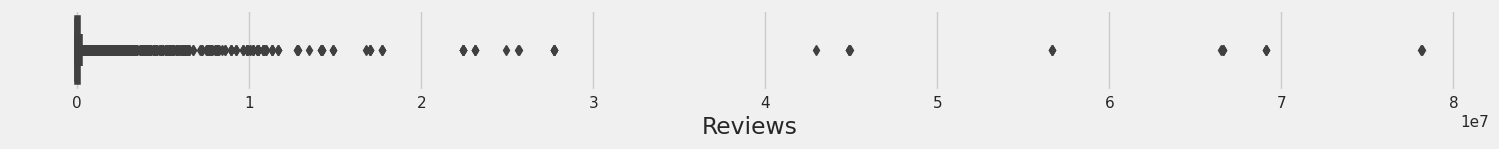

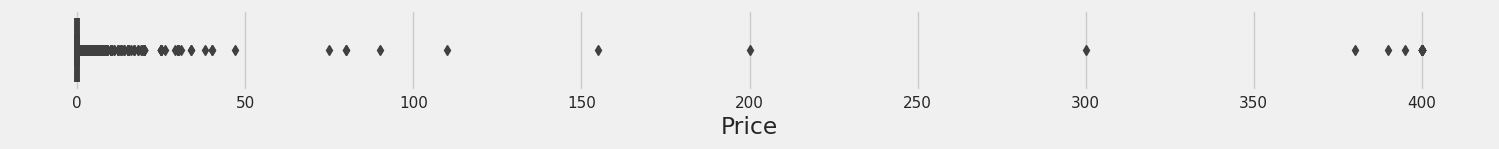

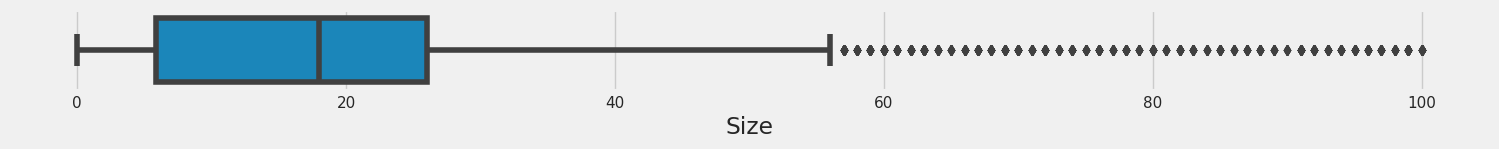

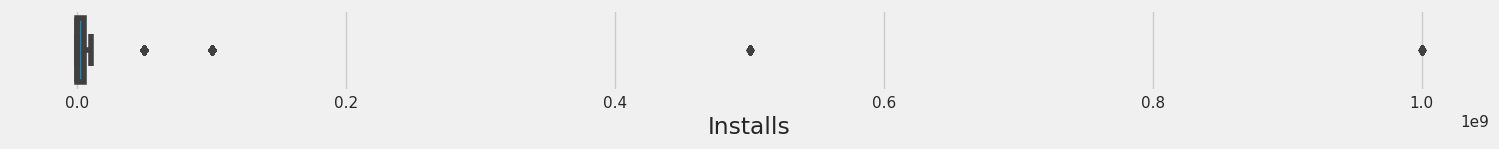

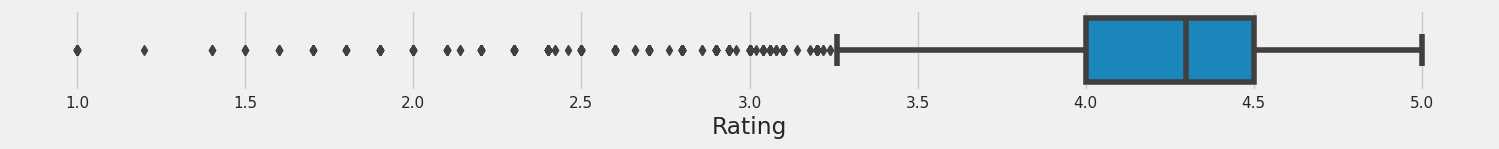

In [103]:

for column in df_new:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_new, x=column)


## KDE- Plot to check the skewness of the data :

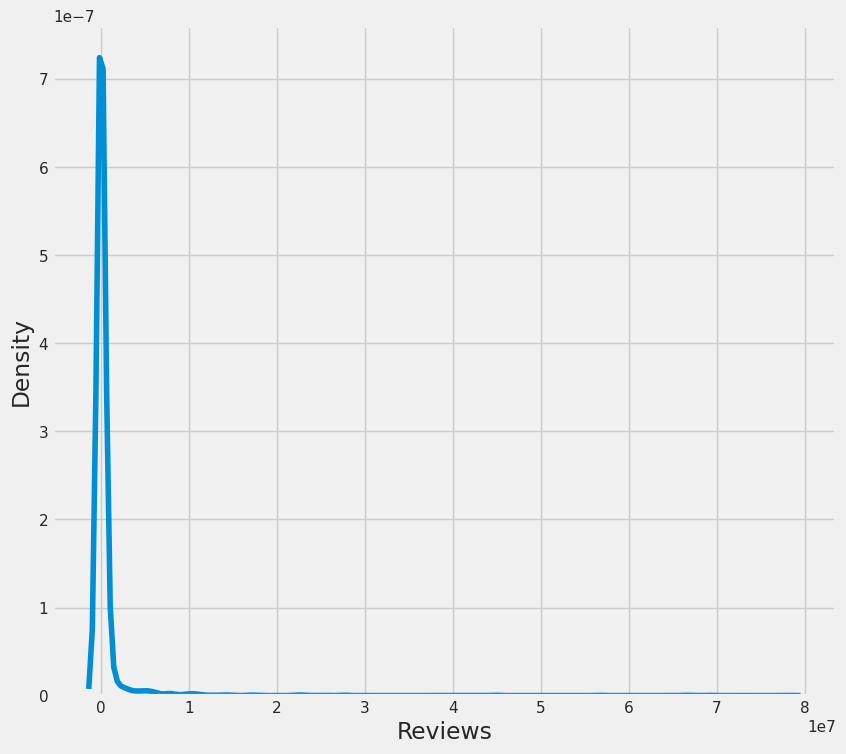

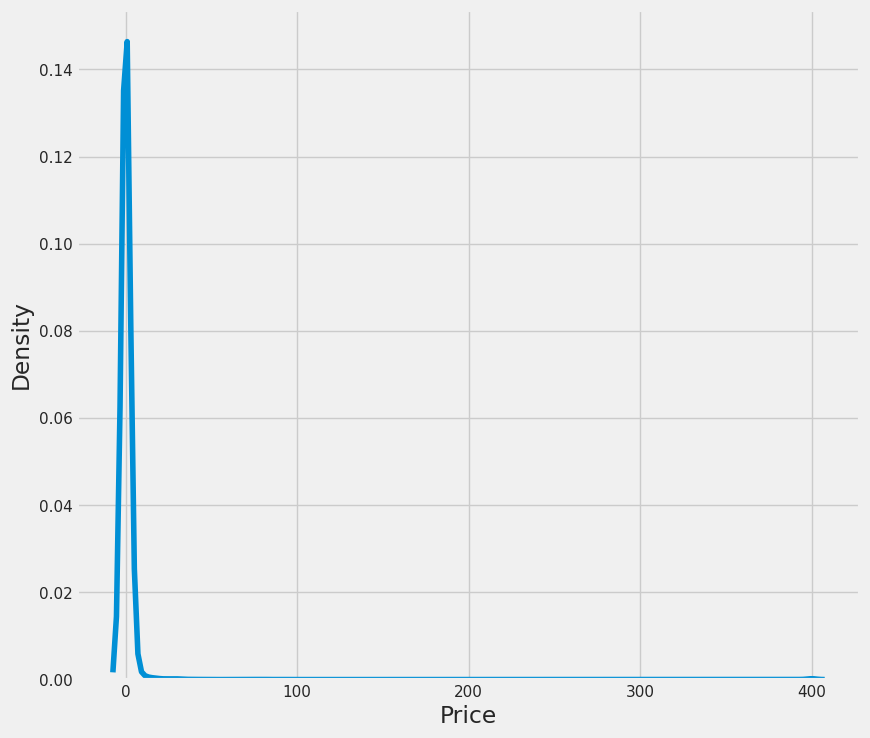

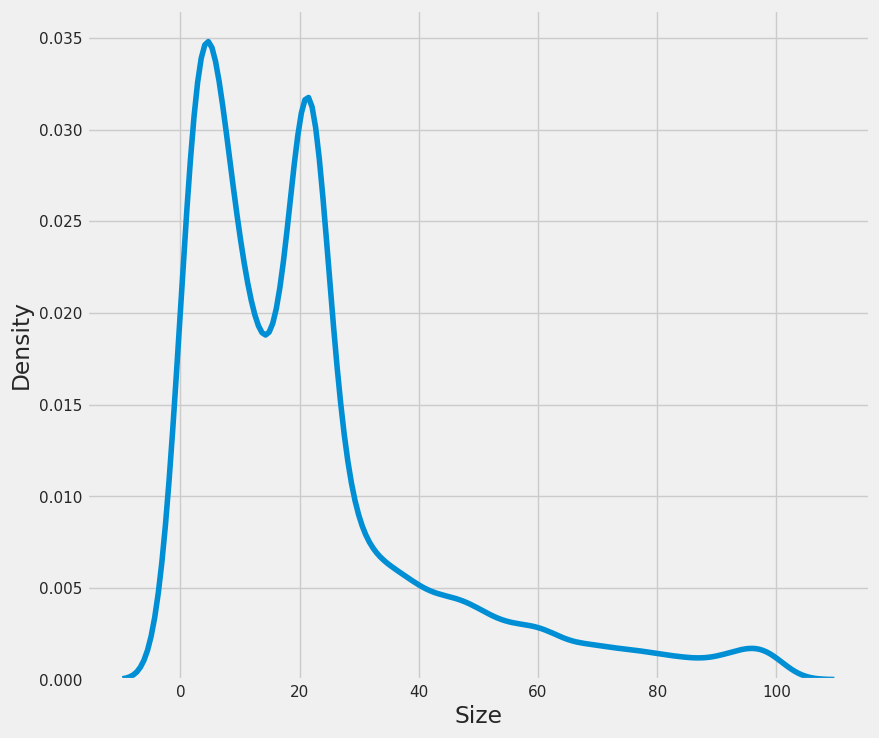

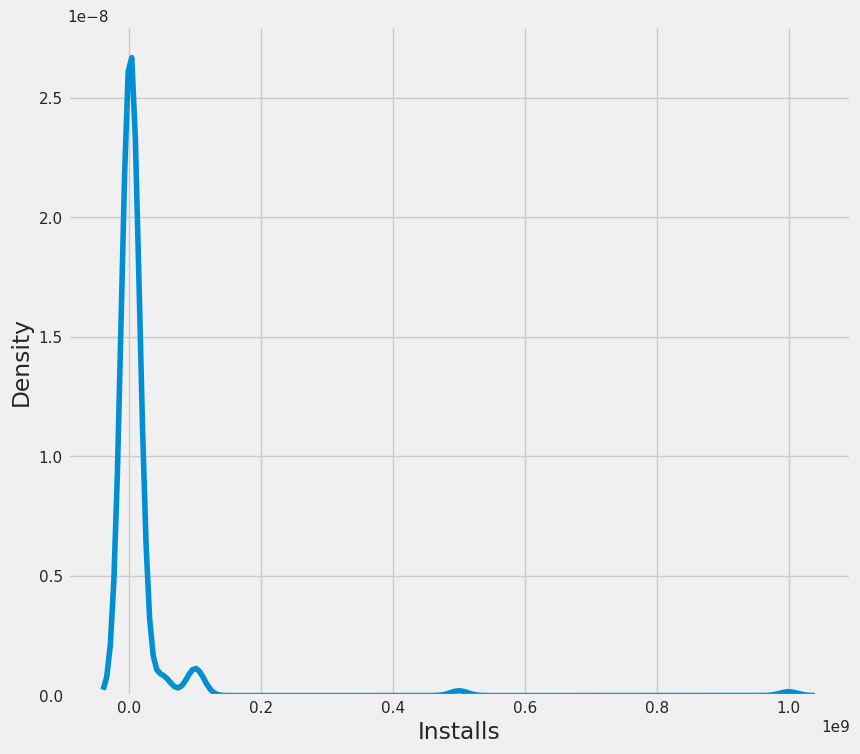

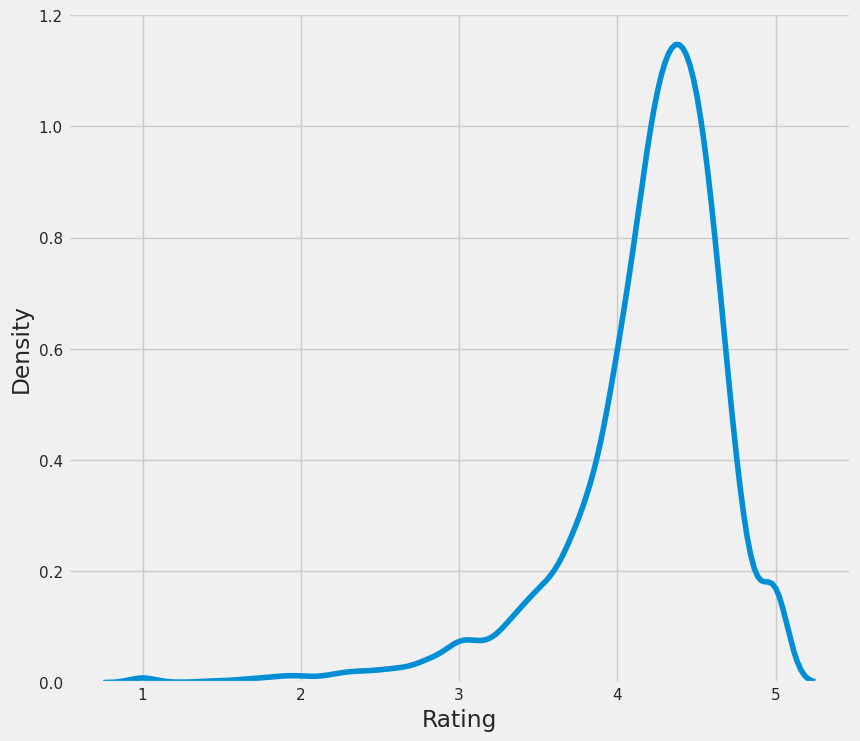

In [104]:
for i in df_new.columns:
  sns.kdeplot(df[i])
  plt.show()

In [105]:
df_new.corr()

,Reviews,Price,Size,Installs,Rating
Reviews,1.000000,-0.009674,0.128186,0.643112,0.061151
Price,-0.009674,1.000000,-0.023038,-0.011698,-0.013276
Size,0.128186,-0.023038,1.000000,0.082120,0.068044
Installs,0.643112,-0.011698,0.082120,1.000000,0.045429
Rating,0.061151,-0.013276,0.068044,0.045429,1.000000


## Heat map for correlation :

<Axes: >

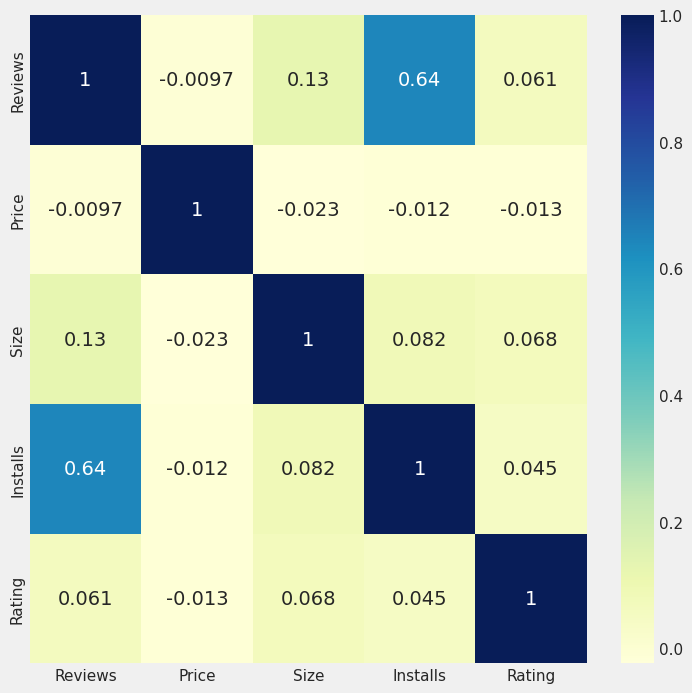

In [106]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_new.corr(),cmap="YlGnBu", annot=True)

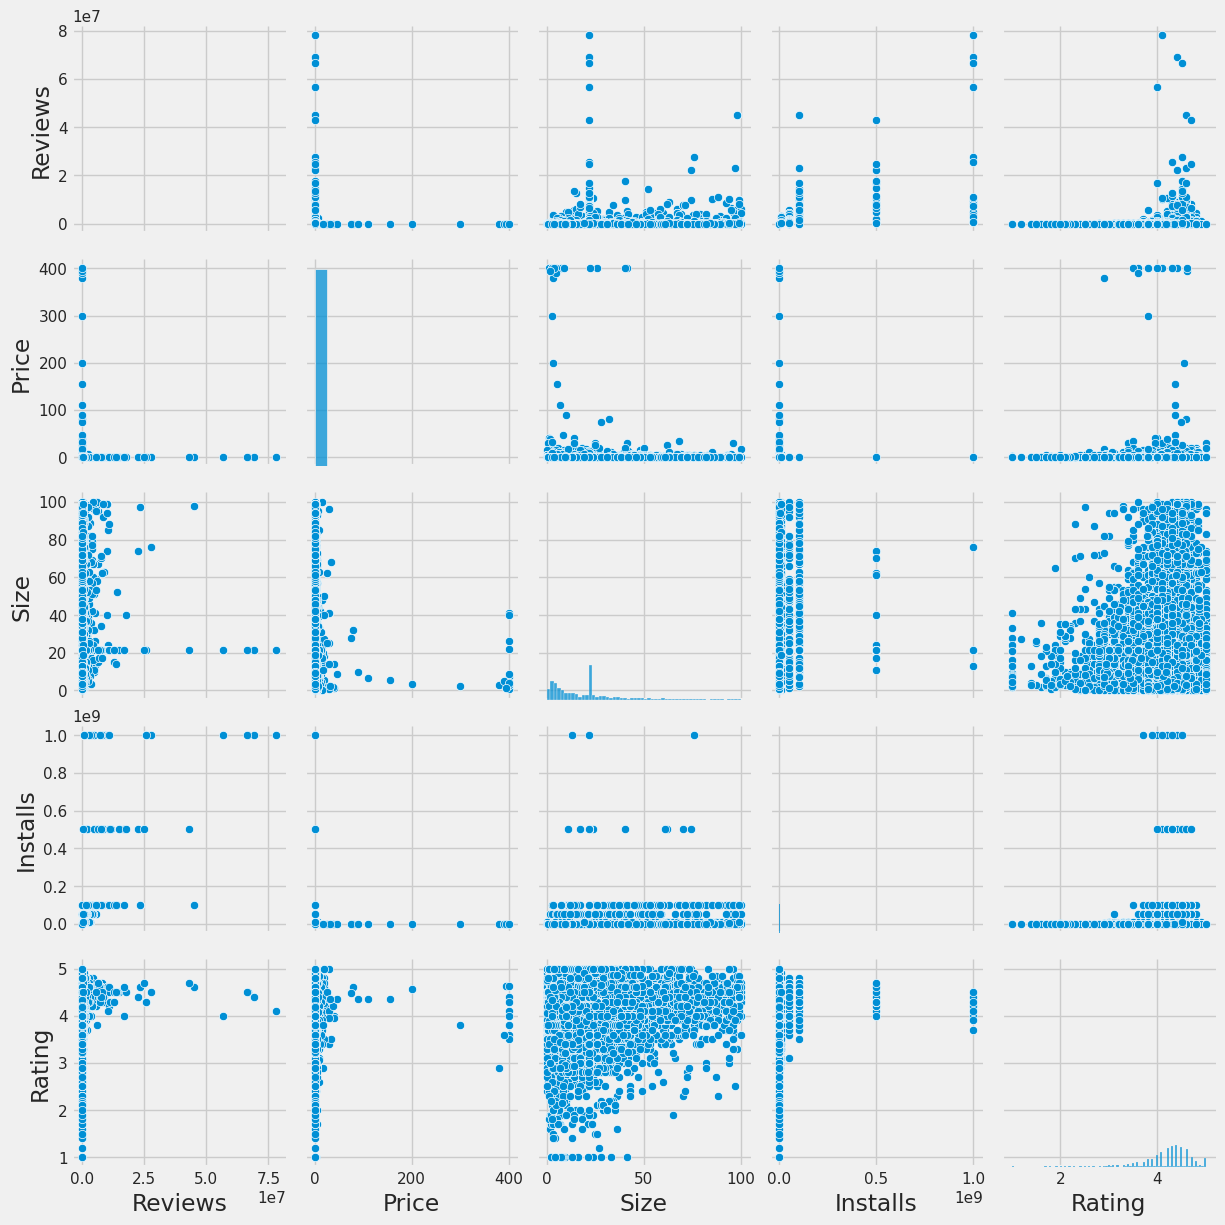

In [107]:
sns.pairplot(df_new)

## Quantile Transformation for scaling 
- since the data is highly skewed we apply qunatile transformation to treat the outlier and reduce the skewness of the data 

In [149]:
import numpy as np 
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
quantile_transformer.fit(df_new[['Reviews',	'Size'	,'Installs'	,'Rating']])
transformed_data = quantile_transformer.transform(df_new[['Reviews',	'Size'	,'Installs'	,'Rating']])
k=pd.DataFrame(transformed_data,columns = ['Reviews',	'Size'	,'Installs'	,'Rating'])


In [150]:
df1=df.select_dtypes(include=['object'])
df1 = df1[['Category','Genres','Type','Content Rating']]
data = pd.merge(k,df1,left_index=True, right_index=True)
data

,Reviews,Size,Installs,Rating,Category,Genres,Type,Content Rating
0,-0.415666,0.030114,-0.403356,-0.462610,ART_AND_D...,Art & Design,Free,Everyone
1,-0.119468,-0.156199,0.174005,-0.830234,ART_AND_D...,Art & Des...,Free,Everyone
2,0.813026,-0.439001,0.756333,1.242061,ART_AND_D...,Art & Design,Free,Everyone
3,1.055495,0.648724,1.525529,0.601439,ART_AND_D...,Art & Design,Free,Teen
4,-0.119468,-1.255743,-0.025094,0.026349,ART_AND_D...,Art & Des...,Free,Everyone
...,...,...,...,...,...,...,...,...
10824,-0.673702,1.337127,-0.604448,0.601439,MEDICAL,Medical,Free,Everyone
10825,-1.161976,-1.040090,-1.264066,5.199338,SOCIAL,Social,Free,Teen
10826,-1.236652,-0.385726,-0.812654,-1.456896,SOCIAL,Social,Free,Mature 17+
10827,-0.475214,0.313694,-0.812654,0.601439,FAMILY,Education,Free,Everyone


##### To check the distribution after quantile distribution

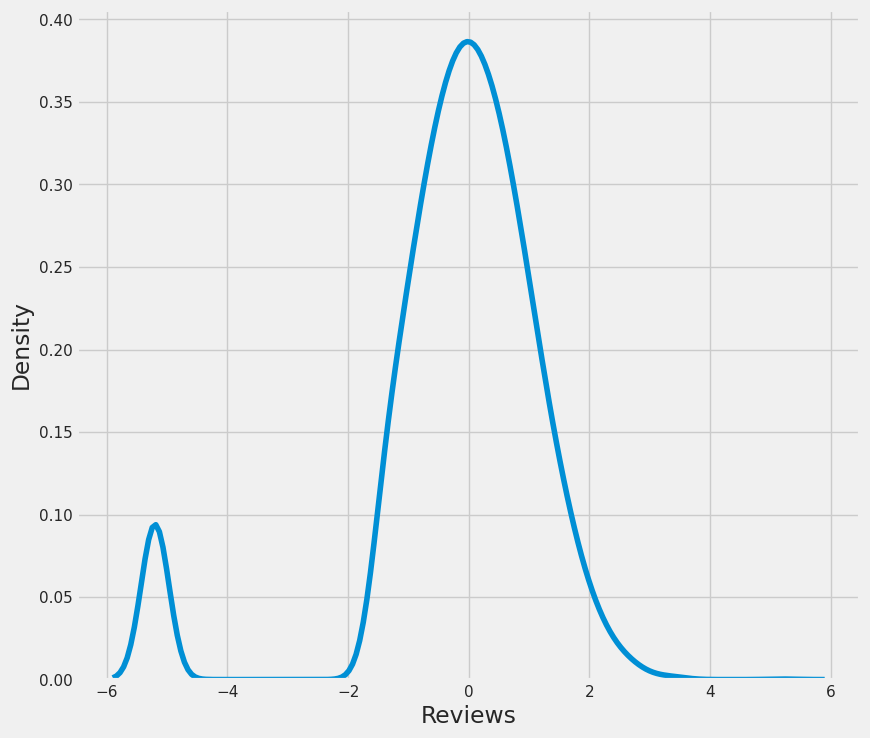

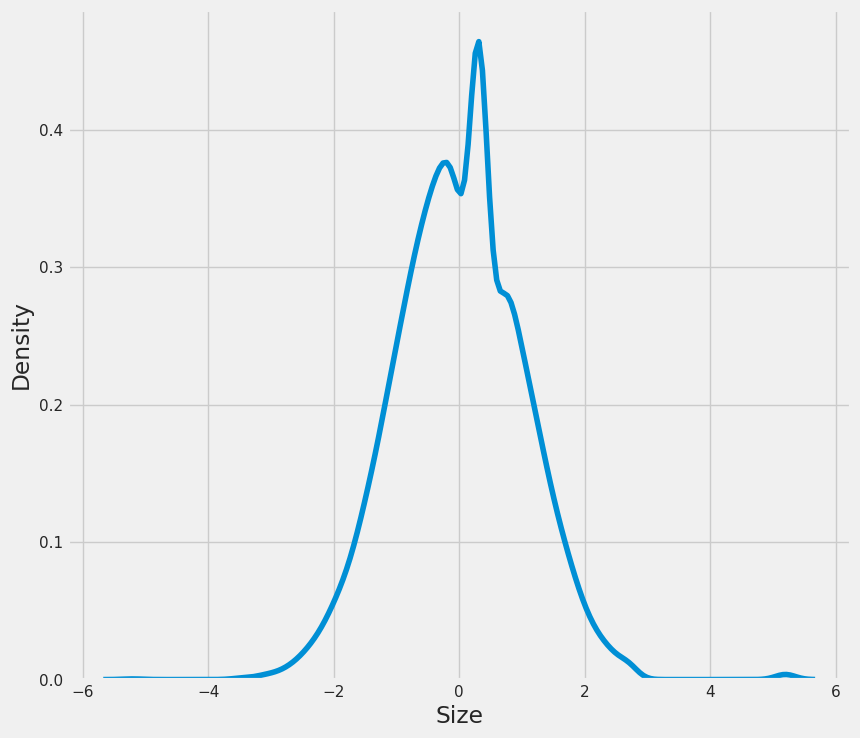

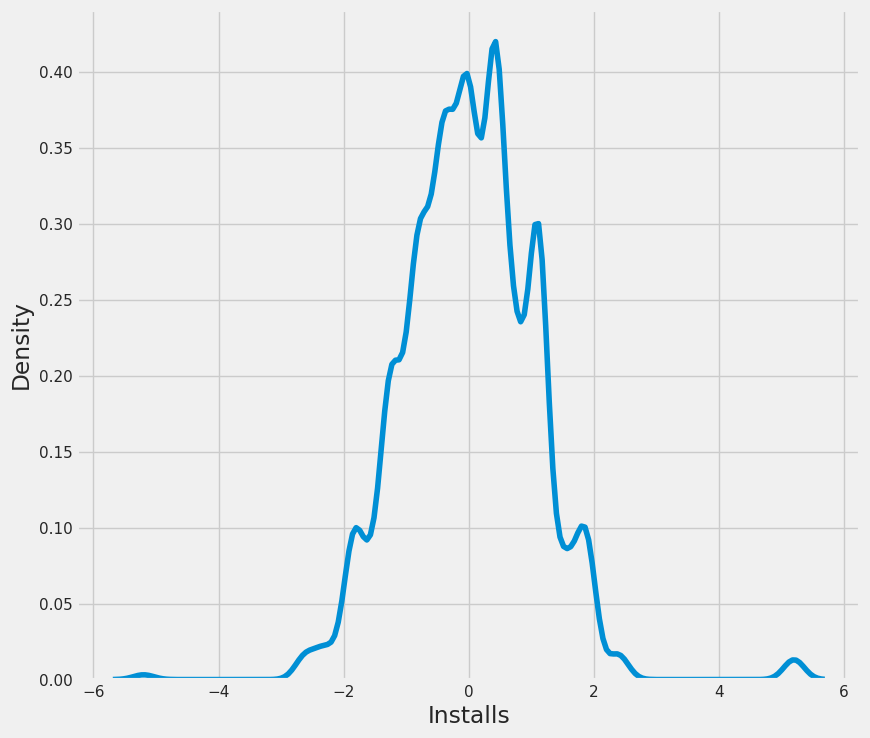

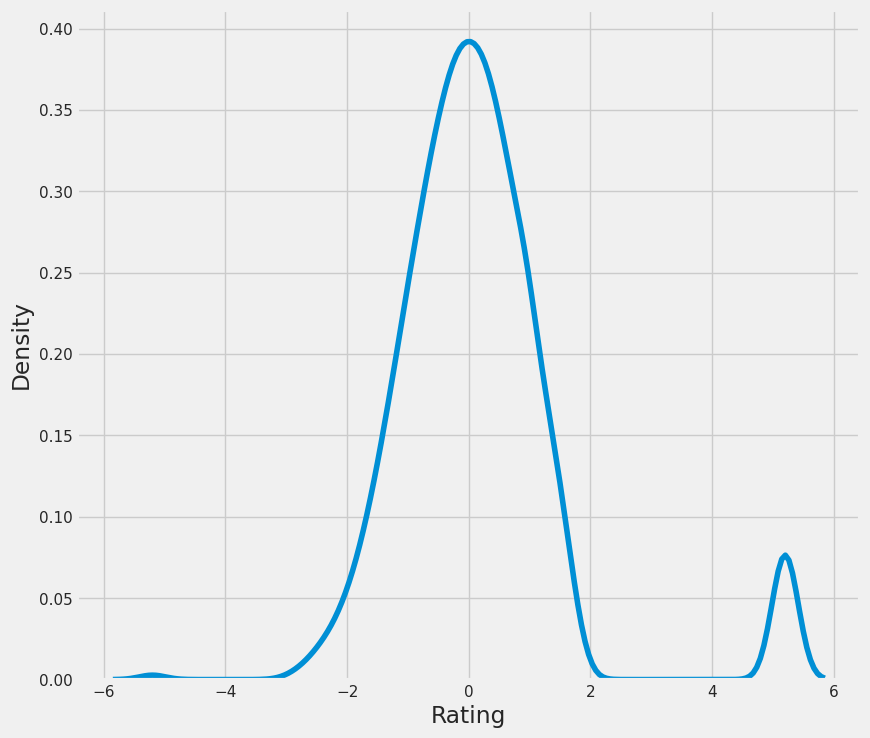

In [151]:
for i in ['Reviews',	'Size'	,'Installs'	,'Rating']:
  sns.kdeplot(k[i])
  plt.show()

## EDA - CATEGORICAL VARIABLE

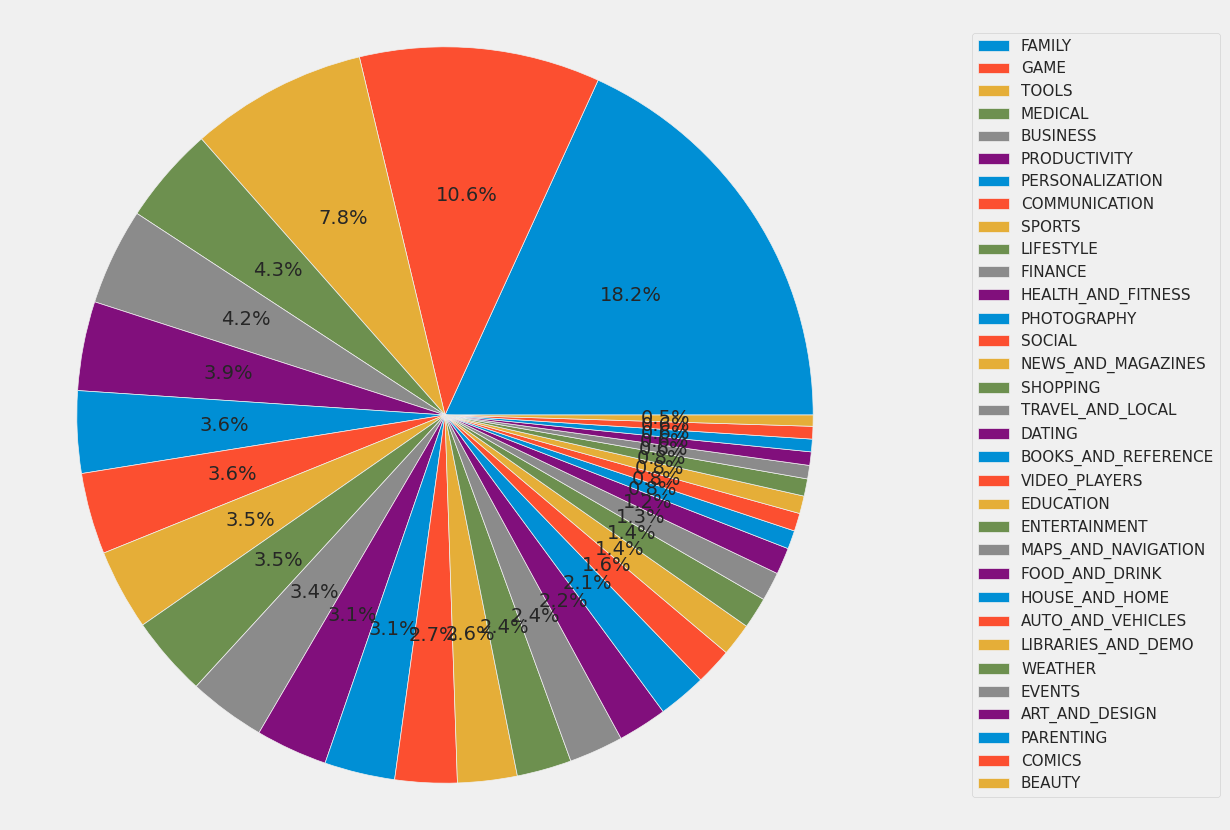

In [152]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = df['Category'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()
     

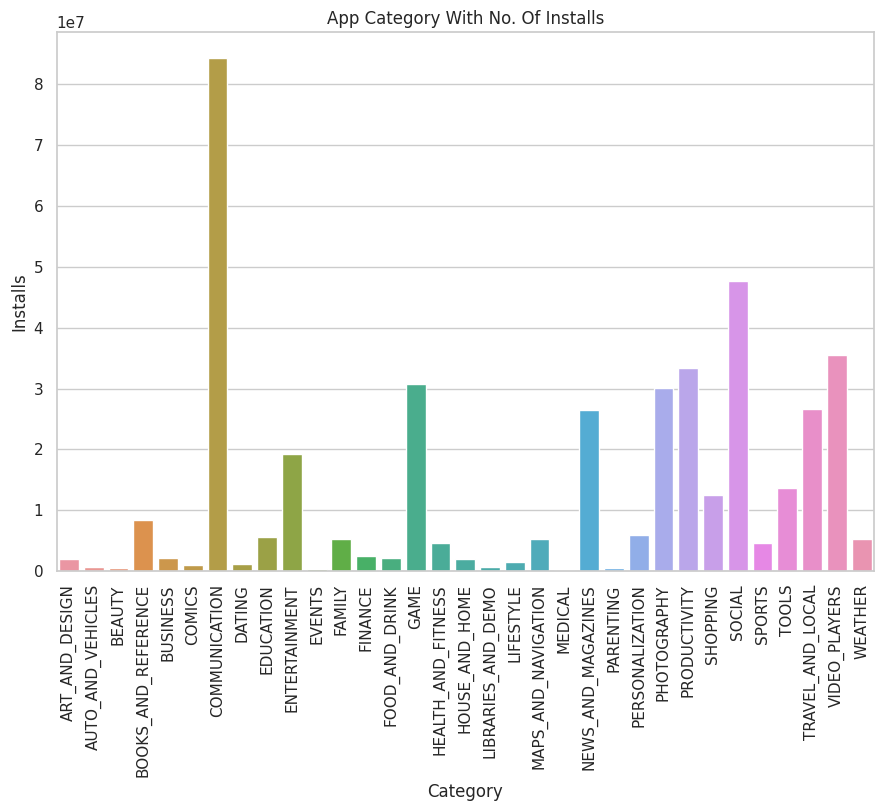

In [153]:
df1 = df.groupby('Category')[ 'Installs'].mean()
new_df = df1.reset_index()

from pylab import rcParams
rcParams['figure.figsize'] = 9,8.27
sns.set_theme(style="whitegrid")
af = sns.barplot(x='Category',y='Installs',data=new_df).set(title="App Category With No. Of Installs")
plt.xticks(rotation=90)
plt.tight_layout()
     

In [154]:
x = df['Category'].value_counts()
y = df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

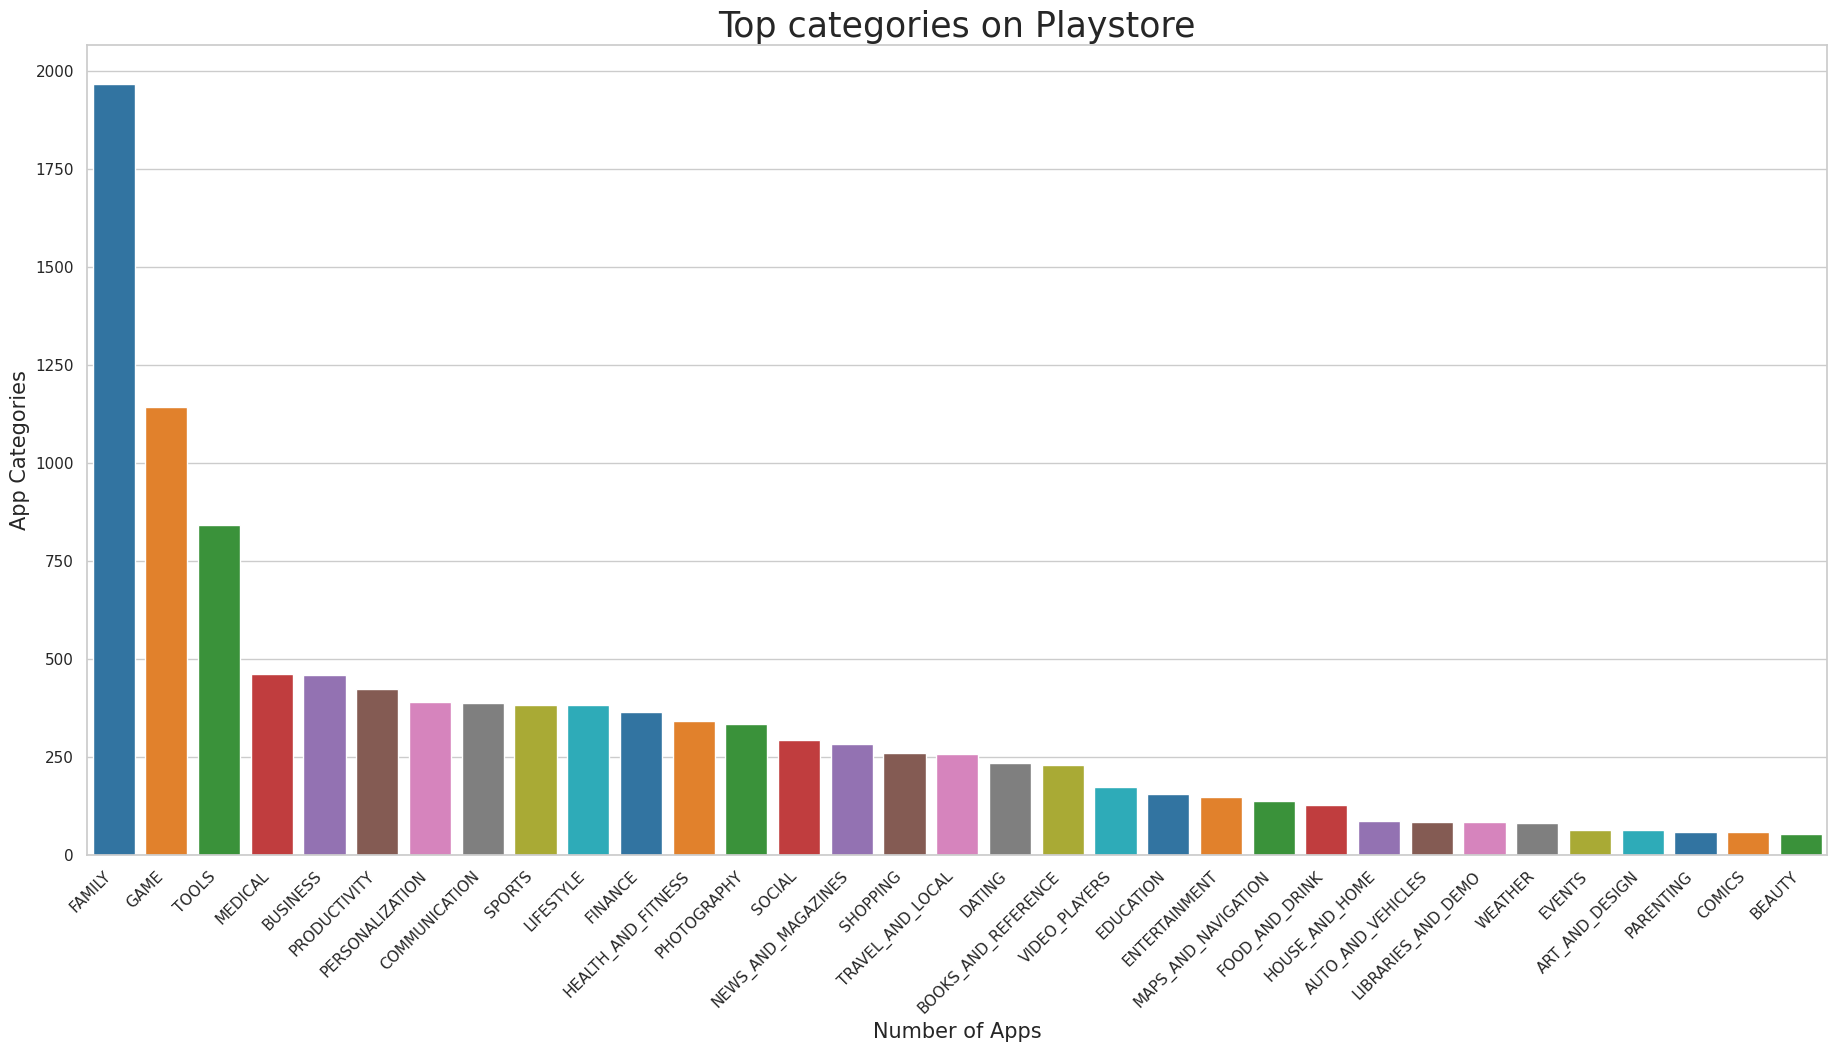

In [155]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

#### ONE-ONE HOT ENCODING

In [156]:
#applying ohe on categorical columns 
from sklearn.preprocessing import OneHotEncoder
data1 = pd.get_dummies(data,columns=['Category','Genres','Type','Content Rating'] )
data1

,Reviews,Size,Installs,Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Weather,Genres_Word,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,-0.415666,0.030114,-0.403356,-0.462610,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.119468,-0.156199,0.174005,-0.830234,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0.813026,-0.439001,0.756333,1.242061,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.055495,0.648724,1.525529,0.601439,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,-0.119468,-1.255743,-0.025094,0.026349,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,-0.673702,1.337127,-0.604448,0.601439,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10825,-1.161976,-1.040090,-1.264066,5.199338,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10826,-1.236652,-0.385726,-0.812654,-1.456896,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10827,-0.475214,0.313694,-0.812654,0.601439,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


PCA for Dimensionality Reduction to avoid curse of dimensionality:

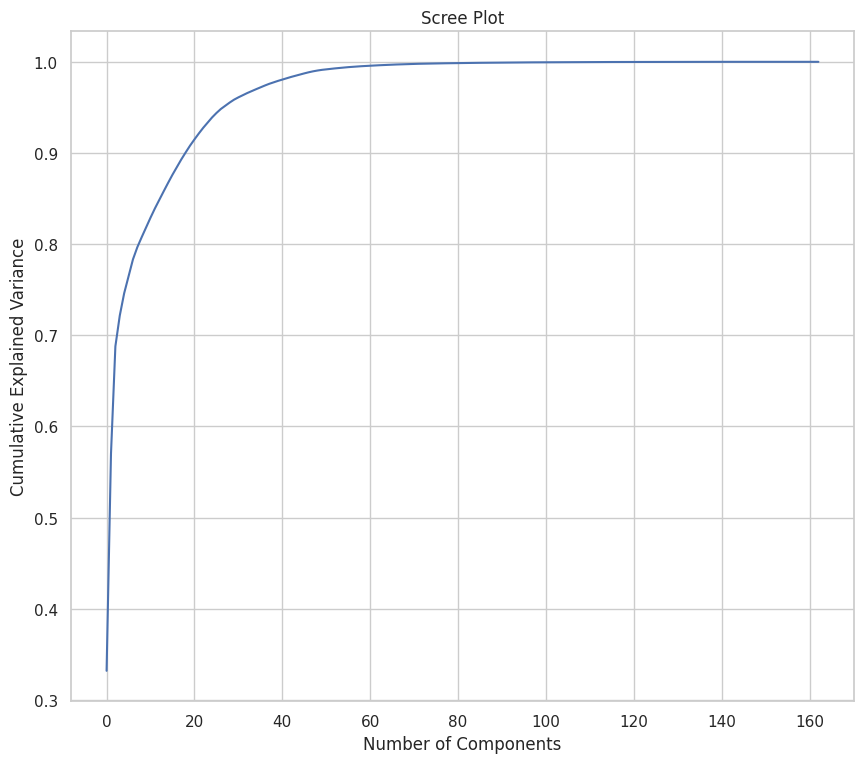

In [157]:
from sklearn.decomposition import PCA

X = data1.loc[:,data1.columns != 'Installs']
pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

- from the graph we can choose n_estimators as 40

In [158]:
pca = PCA(n_components=40)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio for each principal component
pca.explained_variance_ratio_

# Print the transformed data
X = pd.DataFrame(X_pca)
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.054586,0.615821,0.140511,-0.220415,-0.093115,-0.171669,-0.073175,-0.010800,-0.021775,-0.027650,...,0.159319,0.094498,0.102177,-0.044667,-0.019822,0.003615,0.039558,0.033379,0.376699,0.150292
1,-0.426866,0.864581,-0.096811,-0.217618,-0.079040,-0.165428,-0.079897,-0.002371,-0.021943,-0.022371,...,0.116802,0.066002,0.068950,-0.030122,-0.011754,0.002335,0.026291,0.021922,0.220789,0.085432
2,-0.234686,-1.294760,-0.832562,-0.226343,-0.048586,-0.143836,-0.074008,-0.019579,-0.028982,-0.001478,...,0.159207,0.096546,0.095977,-0.042833,-0.018335,0.005762,0.038907,0.027601,0.372963,0.156003
3,-1.035427,-1.066785,0.198240,0.947292,-0.216963,0.019128,0.133138,-0.338145,0.208949,-0.336946,...,0.120438,0.086817,0.134085,-0.039101,-0.007457,0.042224,0.040530,0.016443,0.355143,0.152966
4,0.225462,0.334386,-1.205352,-0.159112,-0.047155,-0.166042,-0.099551,0.038881,-0.035668,-0.008184,...,0.117465,0.064429,0.068244,-0.028728,-0.009404,-0.000279,0.030192,0.022088,0.230124,0.086608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,0.352239,-0.497136,1.387858,-0.352897,-0.197605,0.027292,-0.301068,-0.257674,-0.492654,0.003539,...,-0.011750,-0.006363,-0.020417,0.002330,0.001054,0.010545,-0.002236,-0.004101,-0.014085,0.003595
10813,3.325521,-3.922507,-1.089304,1.254832,-0.276762,-0.031870,0.176245,-0.519676,0.189082,-0.355817,...,0.129095,-0.022960,-0.127422,0.013708,-0.006733,-0.023660,-0.003002,-0.014749,-0.032192,-0.011586
10814,0.270666,1.909586,0.101769,0.850928,-0.305483,-0.132251,0.043501,-0.606598,-0.309517,0.511355,...,-0.353458,-0.010938,0.236434,-0.003230,0.019412,0.048118,0.014830,0.019785,0.017449,-0.014071
10815,0.412405,-0.365151,0.372647,-0.146854,0.964135,-0.117727,0.169563,0.205480,-0.084635,0.094759,...,-0.042551,-0.035283,-0.048426,0.028612,0.032276,0.061142,0.008014,-0.023632,-0.078532,0.059759


## MODEL BUILDING 
- Logistic Regression 
- Decision Tree 
- Random Forest 
- XGBoost 




##### DIVISION OF DATA INTO INDEPENDENT VARIABLE AND TARGET VARIABLE

In [159]:
X = X
y = data1['Installs']


##### SPLITTING THE DATA INTO TRAIN TEST AND SPLIT

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


### LOGISTIC REGRESSION

Variance score is: 0.7213204770468227
MAE: 0.38115736937071
MSE: 0.3096998739967078
RMSE: 0.5565068499099609
R-squared:  0.7213204770468227


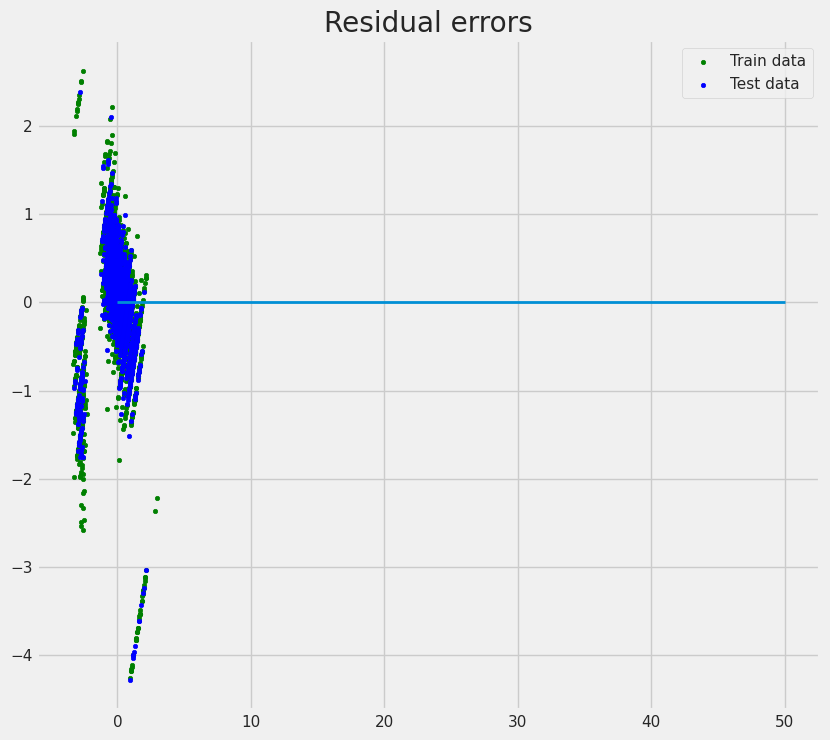

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


scaler = StandardScaler()
X = scaler.fit_transform(X)
reg1 = LinearRegression()  
  
# Now, we will train the model by using the training sets  
reg1.fit(X_train, y_train)  
y_pred = reg1.predict(X_test)  
# here, we will print the regression coefficients  
# print('Regression Coefficients are: ', reg1.coef_)  

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
  
# Here, we will print the variance score: 1 means perfect prediction  
print('Variance score is: {}'.format(reg1.score(X_test, y_test)))  
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print('R-squared: ', r2)

plt.style.use('fivethirtyeight')  
  
# here we will plot the residual errors in training data  
plt.scatter(reg1.predict(X_train), reg1.predict(X_train) - y_train,  
            color = "green", s = 10, label = 'Train data')  
  
# Here, we will plot the residual errors in test data  
plt.scatter(reg1.predict(X_test), reg1.predict(X_test) - y_test,  
            color = "blue", s = 10, label = 'Test data')  
  
# Here, we will plot the line for zero residual error  
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)  
  
# here, we will plot the legend  
plt.legend(loc = 'upper right')  
  
# now, we will plot the title  
plt.title("Residual errors")  
  
# here, we will define the method call for showing the plot  
plt.show()    

In [162]:
import statsmodels.api as sm
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Installs   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              666.4
Date:                Thu, 30 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:38:49   Log-Likelihood:                         -9125.5
No. Observations:               10817   AIC:                                  1.833e+04
Df Residuals:                   10777   BIC:                                  1.862e+04
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### RANDOM FOREST

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print('R-squared: ', r2)

MAE: 0.19785620605002574
MSE: 0.09998342803225338
RMSE: 0.31620156234948205
R-squared:  0.9100311741568616


XGBOOST

In [164]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Fit the model on the training set
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
rmse = (mse)**(1/2)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('R-squared: ', r2)

Mean Squared Error:  0.1007834892591307
Root Mean Squared Error:  0.3174641542901036
R-squared:  0.9093112491592755


ADABOOST

In [147]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

base_estimator = DecisionTreeRegressor(max_depth=3)

# Create an AdaBoost regressor with 100 estimators
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 3728941979605243.0
R-squared: 0.5051312098147385


#### XGBoost shows the best result 
- Mean Squared Error:  0.100
- Root Mean Squared Error:  0.316
- R-squared:  0.9098



In [ ]:
from scipy.stats import norm

# Generate some non-normal data
data = np.random.exponential(size=1000)

# Compute the quantiles of the data
quantiles = norm.cdf()

# Apply the inverse quantile transformation
transformed_data = norm.ppf(quantiles)

# Print the mean and standard deviation of the transformed data
print("Mean:", transformed_data.mean())
print("Standard Deviation:", transformed_data.std())

#### CONCLUSIONS:
- Most of the apps are from the "Family" category
- communication is having highest number of installs 
- Reviews	,Size	,Installs	,Rating	,Category	,Genres	,Type	,Content Rating are the important feature to predict the number of installments of an app.
- outliers and skewness of the data was removed using quantile transformation 
- Highly rated apps are mostly less than 80 MB
- Insatalls and reviews shows a positive correlations of 0.64 
